In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_mfdataset("nc_hur/*.nc")

ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation

In [3]:
if True:   
    def preproc(ds: xr.Dataset) -> xr.Dataset:
        dsa = ds.copy()
        dsa = dsa.expand_dims("member")
        if "__xarray_dataarray_variable__" in dsa:
            dsa = dsa["__xarray_dataarray_variable__"].rename("hur").to_dataset()
        dsa = dsa.assign_coords(
            {
                "member": [
                    str(dsa.institution.values)
                    + "."
                    + str(dsa.model.values)
                    + "."
                    + str(dsa.member_id.values)
                ]
            }
        )
        return dsa

    rh_ds = (
        xr.open_mfdataset("nc_hur/*.nc", concat_dim="member", preprocess=preproc)
        .drop("lon")
        .drop("lat")
    )
    rh_sel =  rh_ds.sel(time=slice("1958", "2017"))

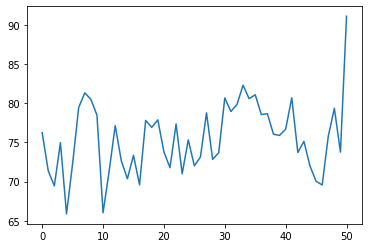

In [5]:
plt.plot(rh_sel.isel(x=100, y=50, time=100).hur.values)

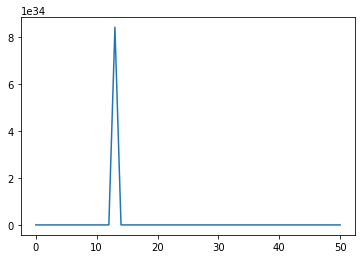

In [6]:
plt.plot(rh_sel.isel(x=280, y=90, time=100).hur.values)

In [8]:
safe_mean = rh_sel.where(rh_sel<100).fillna(100).where(rh_sel>0).fillna(0).mean("member").mean("time")

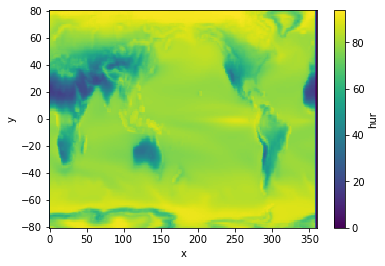

In [10]:
safe_mean.hur.plot()

In [11]:
safe_mean.to_netcdf("nc_mean/hur.nc")

In [13]:
xr.open_dataarray("../../atmos/DATA/rh-ECMWF-clim60.nc")

FileNotFoundError: [Errno 2] No such file or directory: b'/home/jovyan/seager19/atmos/DATA/rh-ECMWF-clim60.nc'